In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import time
import os
import control
from scipy import signal
from numpy import array
from numpy import matmul 
from numpy.linalg import inv
from numpy import linalg as LA

Ariketa honetan bigarren ordenako transferentzia funtzio bat landuko dugu: 
$G(s)=\frac{w^2}{s^2+0.1*w*s+w^2}$

Hasteko, transferentzia funtzioa definituko dugu:

In [2]:
omega=10
dt=0.01
num=[omega**2]
den=[1,0.1*omega,omega**2]

In [3]:
#sys_ss_d = control.tf2ss(num, den,dt) 

#sys_tf=signal.TransferFunction(num,den) 
#sys_tf_d =sys_tf.sample(dt, method='bilinear')

#state space lortzeko horrelako komando bat erabiltzea gustatuko litzaidake:
#[A,B,C,D]= control.tf2ss(num, den,dt) 

In [4]:
sys_state_space = control.tf2ss(num,den)
sys_state_discrete= control.c2d(sys_state_space,dt,'zoh')
print(sys_state_discrete)

A = [[ 0.98508718 -0.9933591 ]
 [ 0.00993359  0.99502077]]

B = [[9.93359096e-03]
 [4.97922626e-05]]

C = [[  0. 100.]]

D = [[0.]]

dt = 0.01



In [5]:
Am=array([[0.98508718, -0.9933591],[0.00993359, 0.99502077]])
Bm=array([[9.93359096e-03],[4.97922626e-05]])
Cm=array([[0,100]])

Orain "modelo"-tik (Am,Bm,Cm) ---> augmented model (Ae,Be,Ce)

In [6]:
if len(Cm)==1 and len(Bm)==1:
    m1=1
    n1=1
    n_in=1
else:
    [m1,n1]=len(Cm),len(Cm[0])
    [n1,n_in]=len(Bm),len(Bm[0])
    
Ae=np.identity(n1+m1)
Ae[0:n1,0:n1]=Am
Ae[n1:n1+m1,0:n1]=np.matmul(Cm,Am)
Be=np.zeros((n1+m1,n_in))
Be[0:n1,:]=Bm
Be[n1:n1+m1,:]=np.matmul(Cm,Bm)
Ce=np.zeros((m1,m1+n1))
Ce[:,n1:n1+m1]=np.eye(m1,m1)
print(Ae)
print(Be)
print(Ce)

[[ 9.8508718e-01 -9.9335910e-01  0.0000000e+00]
 [ 9.9335900e-03  9.9502077e-01  0.0000000e+00]
 [ 9.9335900e-01  9.9502077e+01  1.0000000e+00]]
[[9.93359096e-03]
 [4.97922626e-05]
 [4.97922626e-03]]
[[0. 0. 1.]]


In [7]:
if len(Cm)==1 and len(Bm)==1:
    m1=1
    n1=1
    n_in=1
else:
    [m1,n1]=len(Cm),len(Cm[0])
    [n1,n_in]=len(Bm),len(Bm[0])
    
Ae=np.identity(n1+m1)
Ae[0:n1,0:n1]=Am
Ae[n1:n1+m1,0:n1]=np.matmul(Cm,Am)
Be=np.zeros((n1+m1,n_in))
Be[0:n1,:]=Bm
Be[n1:n1+m1,:]=np.matmul(Cm,Bm)
Ce=np.zeros((m1,m1+n1))
Ce[:,n1:n1+m1]=np.eye(m1,m1)
print(Ae)
print(Be)
print(Ce)
Np=20
Nc=3
print(n1)
print(m1)
n=n1+m1
print("Orain kalkultatutakoak Np=",Np)
# F=np.empty(Nc)
# F=np.vstack(F)
#h=np.empty((Np,1))

h=np.reshape(Ce[0,:],(1,len(Ce[0,:])))
F=np.matmul(Ce,Ae)

for kk in range(1,Np):
    h=np.insert(h,kk,np.matmul(h[kk-1,:],Ae),0)
    F=np.insert(F,kk,np.matmul(F[kk-1,:],Ae),0)
v=np.matmul(h,Be)
Phi=np.zeros((Np,Nc))
Phi[:,0]=v[:,0]
for i in range(1,Nc):
    Phi[:,i]=np.concatenate([np.zeros((i,1)),np.reshape(v[0:Np-i,0],(len(v[0:Np-i,0]),1))])[:,0]
BarRs=np.ones((Np,1))
Phi_Phi=np.matmul(Phi.transpose(),Phi)
Phi_F=np.matmul(Phi.transpose(),F)
Phi_R=np.matmul(Phi.transpose(),BarRs)
print("phi_phi", Phi_Phi)
print("phi_F", Phi_F)
print("phi_R", Phi_R)

#deltaU=matmul(inv(Phi_Phi+100*np.identity(Phi_Phi.shape[0])),Phi_R-matmul(Phi_F,state_v))
xm=[[0],[0]]
xf=np.zeros((n,1))
print(xf)

r=np.ones((100,1))
deltaU=matmul(inv(Phi_Phi+0.5*np.identity(Nc)),Phi_R*r[0]-matmul(Phi_F,xf))
    
print("deltaU",deltaU)
    
setpoint=matmul(inv(Phi_Phi+0.5*np.identity(Phi_Phi.shape[0])),Phi_R)
Ky=setpoint[0] #lehenengo elementua 
state=matmul(inv(Phi_Phi+0.5*np.identity(Phi_Phi.shape[0])),Phi_F)
Kmpc=state[0] #lehenego il
print(Ky)
print(Kmpc)
print(LA.eigvals(Ae-matmul(Be,np.reshape(Kmpc,(1,3)))))

[[ 9.8508718e-01 -9.9335910e-01  0.0000000e+00]
 [ 9.9335900e-03  9.9502077e-01  0.0000000e+00]
 [ 9.9335900e-01  9.9502077e+01  1.0000000e+00]]
[[9.93359096e-03]
 [4.97922626e-05]
 [4.97922626e-03]]
[[0. 0. 1.]]
2
1
Orain kalkultatutakoak Np= 20
phi_phi [[9.87958351 8.93864949 8.00986626]
 [8.93864949 8.10203102 7.27364962]
 [8.00986626 7.27364962 6.54245705]]
phi_F [[1.03424927e+03 9.92472171e+03 1.10928753e+01]
 [9.34946723e+02 8.81927809e+03 9.75962649e+00]
 [8.37070974e+02 7.75702366e+03 8.51079745e+00]]
phi_R [[11.09287534]
 [ 9.75962649]
 [ 8.51079745]]
[[0.]
 [0.]
 [0.]]
deltaU [[ 0.95133461]
 [ 0.30837397]
 [-0.19201675]]
[0.95133461]
[ 45.41678234 705.61316808   0.95133461]
[0.69737988+0.j        0.89585267+0.1428538j 0.89585267-0.1428538j]


[[ 9.8508718e-01 -9.9335910e-01  0.0000000e+00]
 [ 9.9335900e-03  9.9502077e-01  0.0000000e+00]
 [ 9.9335900e-01  9.9502077e+01  1.0000000e+00]]
[[9.93359096e-03]
 [4.97922626e-05]
 [4.97922626e-03]]
[[0. 0. 1.]]
phi_phi [[9.87958351 8.93864949 8.00986626]
 [8.93864949 8.10203102 7.27364962]
 [8.00986626 7.27364962 6.54245705]]
phi_F [[1.03424927e+03 9.92472171e+03 1.10928753e+01]
 [9.34946723e+02 8.81927809e+03 9.75962649e+00]
 [8.37070974e+02 7.75702366e+03 8.51079745e+00]]
phi_R [[11.09287534]
 [ 9.75962649]
 [ 8.51079745]]
[[ 110.83806227]
 [-221.43269587]
 [ 111.78316952]]
110.8380622741679
-119.93190998314822
[[12.61994578]
 [-8.01981852]
 [-5.23269737]]
12.619945780478474
-2.979827155800706
[[ 7.62983953]
 [-1.26672175]
 [-6.62186814]]
7.629839527524105
-1.8439261151745097


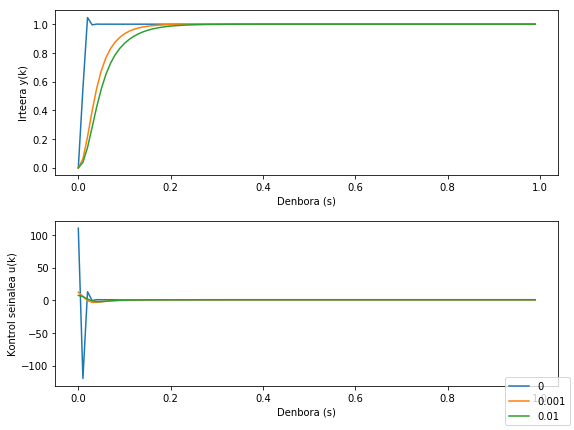

In [12]:
if len(Cm)==1 and len(Bm)==1:
    m1=1
    n1=1
    n_in=1
else:
    [m1,n1]=len(Cm),len(Cm[0])
    [n1,n_in]=len(Bm),len(Bm[0])
    
Ae=np.identity(n1+m1)
Ae[0:n1,0:n1]=Am
Ae[n1:n1+m1,0:n1]=np.matmul(Cm,Am)
Be=np.zeros((n1+m1,n_in))
Be[0:n1,:]=Bm
Be[n1:n1+m1,:]=np.matmul(Cm,Bm)
Ce=np.zeros((m1,m1+n1))
Ce[:,n1:n1+m1]=np.eye(m1,m1)
print(Ae)
print(Be)
print(Ce)

Np=20
Nc=3

n=n1+m1
# F=np.empty(Nc)
# F=np.vstack(F)
#h=np.empty((Np,1))

h=np.reshape(Ce[0,:],(1,len(Ce[0,:])))
F=np.matmul(Ce,Ae)

for kk in range(1,Np):
    h=np.insert(h,kk,np.matmul(h[kk-1,:],Ae),0)
    F=np.insert(F,kk,np.matmul(F[kk-1,:],Ae),0)
    
v=np.matmul(h,Be)
Phi=np.zeros((Np,Nc))
Phi[:,0]=v[:,0]
for i in range(1,Nc):
    Phi[:,i]=np.concatenate([np.zeros((i,1)),np.reshape(v[0:Np-i,0],(len(v[0:Np-i,0]),1))])[:,0]
BarRs=np.ones((Np,1))
Phi_Phi=np.matmul(Phi.transpose(),Phi)
Phi_F=np.matmul(Phi.transpose(),F)
Phi_R=np.matmul(Phi.transpose(),BarRs)
print("phi_phi", Phi_Phi)
print("phi_F", Phi_F)
print("phi_R", Phi_R)
      
Nsim=100
fig, axes = plt.subplots(nrows=2, ncols=1,  figsize=(8,6), );# sharex=True, sharey=True,;
ax0, ax1 = axes.flat
fig.tight_layout()

ax0.set_xlabel('Denbora (s)');
ax0.set_ylabel('Irteera y(k)');
#ax0.set_xlim(left_x_lim, right_x_lim); #x ardatza definitu
#ax0.set_ylim(left_y_lim, right_y_lim); #y ardatza definitu

ax1.set_xlabel('Denbora (s)');
ax1.set_ylabel('Kontrol seinalea u(k)');
#ax1.set_xlim(left_x_lim, right_x_lim); #x ardatza d
#ax1.set_ylim(left_y_lim, right_y_lim); #y ardatza definitu

for j,s in zip([0,0.001,0.01], ["0","0.001","0.01"]):
    [n1,n_in]=len(Be),len(Be[0])
    u1=np.zeros(Nsim)
    y1=np.zeros(Nsim)

    k=np.zeros(Nsim)
    for i in range(0,Nsim):
        k[i]=i

    xm=[[0],[0]]
    xf=np.zeros((n,1))
    r=np.ones((Nsim,1))
    u=0
    y=0
    for kk in range(0,Nsim):
        deltaU=matmul(inv(Phi_Phi+j*np.identity(Nc)),Phi_R*r[kk]-matmul(Phi_F,xf))
        if (kk==0):
            print(deltaU)
        deltau=deltaU[0,0]
        u=u+deltau
        u1[kk]=u
        y1[kk]=y
        xm_old=xm
        xm=matmul(Am,xm)+Bm*u
        y=matmul(Cm,xm)
        xf=np.concatenate((xm-xm_old,y),0)
    k=k*dt
    ax0.plot(k,y1)
    ax1.plot(k,u1,label=s)
    fig.tight_layout()
    print(u1.max())
    print(u1.min())

fig.legend(loc="lower right")
fig.savefig(os.path.join(os.path.expanduser("~"),"Desktop","PENDULUA","grafikoa.png"),format="png",dpi = 150);


[[ 9.8508718e-01 -9.9335910e-01  0.0000000e+00]
 [ 9.9335900e-03  9.9502077e-01  0.0000000e+00]
 [ 9.9335900e-01  9.9502077e+01  1.0000000e+00]]
[[9.93359096e-03]
 [4.97922626e-05]
 [4.97922626e-03]]
[[0. 0. 1.]]
Orain kalkultatutakoak Np= 20
phi_phi [[9.87958351 8.93864949 8.00986626]
 [8.93864949 8.10203102 7.27364962]
 [8.00986626 7.27364962 6.54245705]]
phi_F [[1.03424927e+03 9.92472171e+03 1.10928753e+01]
 [9.34946723e+02 8.81927809e+03 9.75962649e+00]
 [8.37070974e+02 7.75702366e+03 8.51079745e+00]]
phi_R [[11.09287534]
 [ 9.75962649]
 [ 8.51079745]]
[[ 110.83806227]
 [-221.43269587]
 [ 111.78316952]]
[[-230.76997226]
 [ 132.30767758]
 [ -11.39498661]]
[[133.25950369]
 [-13.48722014]
 [  1.1615856 ]]
[[-13.58424767]
 [  1.37486433]
 [ -0.11841006]]
[[ 1.38475515]
 [-0.14015133]
 [ 0.01207052]]
[[-0.14115959]
 [ 0.01428679]
 [-0.00123045]]
[[ 0.01438957]
 [-0.00145637]
 [ 0.00012543]]
[[-1.46684824e-03]
 [ 1.48460015e-04]
 [-1.27861178e-05]]
[[ 1.49528054e-04]
 [-1.51338011e-05]
 

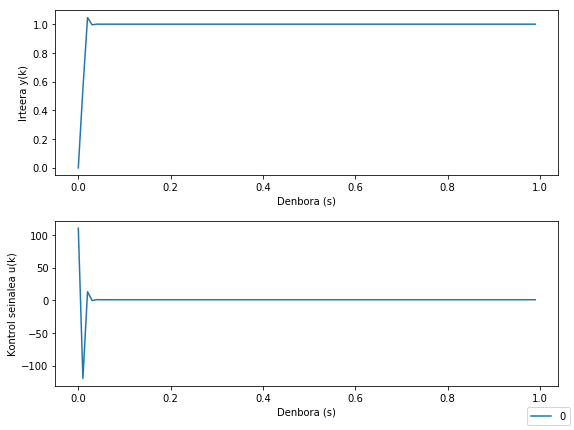

In [9]:
if len(Cm)==1 and len(Bm)==1:
    m1=1
    n1=1
    n_in=1
else:
    [m1,n1]=len(Cm),len(Cm[0])
    [n1,n_in]=len(Bm),len(Bm[0])
    
Ae=np.identity(n1+m1)
Ae[0:n1,0:n1]=Am
Ae[n1:n1+m1,0:n1]=np.matmul(Cm,Am)
Be=np.zeros((n1+m1,n_in))
Be[0:n1,:]=Bm
Be[n1:n1+m1,:]=np.matmul(Cm,Bm)
Ce=np.zeros((m1,m1+n1))
Ce[:,n1:n1+m1]=np.eye(m1,m1)
print(Ae)
print(Be)
print(Ce)

Np=20
Nc=3
n=n1+m1
print("Orain kalkultatutakoak Np=",Np)
# F=np.empty(Nc)
# F=np.vstack(F)
#h=np.empty((Np,1))

h=np.reshape(Ce[0,:],(1,len(Ce[0,:])))
F=np.matmul(Ce,Ae)

for kk in range(1,Np):
    h=np.insert(h,kk,np.matmul(h[kk-1,:],Ae),0)
    F=np.insert(F,kk,np.matmul(F[kk-1,:],Ae),0)
    
v=np.matmul(h,Be)
Phi=np.zeros((Np,Nc))
Phi[:,0]=v[:,0]
for i in range(1,Nc):
    Phi[:,i]=np.concatenate([np.zeros((i,1)),np.reshape(v[0:Np-i,0],(len(v[0:Np-i,0]),1))])[:,0]
BarRs=np.ones((Np,1))
Phi_Phi=np.matmul(Phi.transpose(),Phi)
Phi_F=np.matmul(Phi.transpose(),F)
Phi_R=np.matmul(Phi.transpose(),BarRs)
print("phi_phi", Phi_Phi)
print("phi_F", Phi_F)
print("phi_R", Phi_R)
      
Nsim=100
fig, axes = plt.subplots(nrows=2, ncols=1,  figsize=(8,6), );# sharex=True, sharey=True,;
ax0, ax1 = axes.flat
fig.tight_layout()

ax0.set_xlabel('Denbora (s)');
ax0.set_ylabel('Irteera y(k)');
#ax0.set_xlim(left_x_lim, right_x_lim); #x ardatza definitu
#ax0.set_ylim(left_y_lim, right_y_lim); #y ardatza definitu

ax1.set_xlabel('Denbora (s)');
ax1.set_ylabel('Kontrol seinalea u(k)');
#ax1.set_xlim(left_x_lim, right_x_lim); #x ardatza d
#ax1.set_ylim(left_y_lim, right_y_lim); #y ardatza definitu

for j,s in zip([0], ["0"]):
    [n1,n_in]=len(Be),len(Be[0])
    u1=np.zeros(Nsim)
    y1=np.zeros(Nsim)

    k=np.zeros(Nsim)
    for i in range(0,Nsim):
        k[i]=i

    xm=[[0],[0]]
    xf=np.zeros((n,1))
    r=np.ones((Nsim,1))
    u=0
    y=0
    for kk in range(0,Nsim):
        deltaU=matmul(inv(Phi_Phi+j*np.identity(Nc)),Phi_R*r[kk]-matmul(Phi_F,xf))
        print(deltaU)
        deltau=deltaU[0,0]
        u=u+deltau
        u1[kk]=u
        y1[kk]=y
        xm_old=xm
        xm=matmul(Am,xm)+Bm*u
        y=matmul(Cm,xm)
        xf=np.concatenate((xm-xm_old,y),0)
    k=k*dt
    ax0.plot(k,y1)
    ax1.plot(k,u1,label=s)
    fig.tight_layout()
    print(u1.max())

fig.legend(loc="lower right")
fig.savefig(os.path.join(os.path.expanduser("~"),"Desktop","PENDULUA","grafikoa1.png"),format="png",dpi = 150);